## IMAGE MODELING

###  I) Image processing  

    1) Load  and read the images
    2) Greyscale images with opencv
    3) Apply blur
    4) Edge detection of the images
    5) Increae the thinkness of the edges
    6) Resize images
    7) Rotate images
    8) See All the image modification together by stacking the processed images
    9) Function to do all the preprocessing steps for all images
    10) Image Path creator

###  II) Image Feature Extraction
    
    1) Keypoints detection of an image
    2) Compare each descriptors of the first image with the descriptors of the second image
    
    

Features of a digital image such as colour, texture, shapes and the locations of these features on
the image represent characteristics that enable the image to be distinguished from other images
the first step in any supervised or unsupervised image classification is the detection and extraction features present in the image,
    
keypoints: 

corresponding to high-contrast locations such as object edges and corners on the image are
typically regarded as good descriptive image features and these features are described with the help of descriptors. 

Keypoints dectetion techniques:

 - Shift Invariance Feature Transform (SIFT) is an image feature extraction algorithm that ensures the detection of keypoints that are stable and scale invariant, the keypoints are detected via  DoG (Difference of Gaussian) pyramid created using a Gaussian filtered copy of the image.
 - Speeded-Up Robust Features(SURF) uses the Hessian matrix detector.
 
### III) Bag of visual words and images clustering into categories with Kmeans algorithm

    1) Load the images = create a colum with the matrices of images
    2) Features extraction
    3) Construct a dictionary of visual words  or Bag of Visual Words 
        - by performing a KMeans clustering on the descriptors 
    4) Creating histograms for the images
    

    
 - The BOW model is a popular image representation for classification purposes, which uses a visual-words histogram to effectively represent an image, BOV representation of images is the visual codebook development; a process that requires the use of K-means clustering to quantize the vectors representing image features into visual-words 
 
 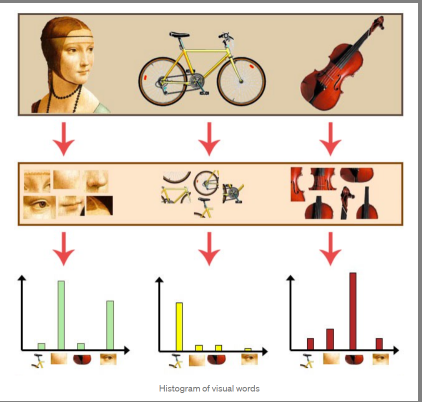
 
 image from : https://towardsdatascience.com/bag-of-visual-words-in-a-nutshell-9ceea97ce0fb
 
  ### IV) Convolutional Neural Networks Model VGG16 (CNN)
 

In [1]:
import pandas as pd
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg


In [2]:
data = pd.read_csv('data.csv')
data_images_matrices= pd.read_csv('data_images.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'uniq_id', 'product_name', 'product_category_tree',
       'image', 'description', 'preprocessed_descriptions'],
      dtype='object')

In [7]:
data = data.drop(columns = ['Unnamed: 0'])

In [8]:
data_category_levels = pd.read_csv('data_category_levels.csv')

In [9]:
data_category_levels.head()

,Unnamed: 0,cat_level_0,cat_level_1,cat_level_2,cat_level_3,cat_level_4,cat_level_5
0,0,Home Furnishing,Home Furnishing/Curtains & Accessories,Home Furnishing/Curtains & Accessories/Curtains,Home Furnishing/Curtains & Accessories/Curtain...,Home Furnishing/Curtains & Accessories/Curtain...,Home Furnishing/Curtains & Accessories/Curtain...
1,1,Baby Care,Baby Care/Baby Bath & Skin,Baby Care/Baby Bath & Skin/Baby Bath Towels,Baby Care/Baby Bath & Skin/Baby Bath Towels/Sa...,Baby Care/Baby Bath & Skin/Baby Bath Towels/Sa...,Baby Care/Baby Bath & Skin/Baby Bath Towels/Sa...
2,2,Baby Care,Baby Care/Baby Bath & Skin,Baby Care/Baby Bath & Skin/Baby Bath Towels,Baby Care/Baby Bath & Skin/Baby Bath Towels/Eu...,Baby Care/Baby Bath & Skin/Baby Bath Towels/Eu...,Baby Care/Baby Bath & Skin/Baby Bath Towels/Eu...
3,3,Home Furnishing,Home Furnishing/Bed Linen,Home Furnishing/Bed Linen/Bedsheets,Home Furnishing/Bed Linen/Bedsheets/SANTOSH RO...,Home Furnishing/Bed Linen/Bedsheets/SANTOSH RO...,Home Furnishing/Bed Linen/Bedsheets/SANTOSH RO...
4,4,Home Furnishing,Home Furnishing/Bed Linen,Home Furnishing/Bed Linen/Bedsheets,Home Furnishing/Bed Linen/Bedsheets/Jaipur Pri...,Home Furnishing/Bed Linen/Bedsheets/Jaipur Pri...,Home Furnishing/Bed Linen/Bedsheets/Jaipur Pri...


In [10]:
data_category_levels.shape

(1050, 7)

In [11]:

# Adding a category column to the data (True categories of the prooducts)
data['category'] = data_category_levels['cat_level_0']

# Encode the categories g
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['encoded_category'] = le.fit_transform(data['category'])


In [12]:
data_images_matrices.columns

Index(['Unnamed: 0', 'image', 'image_matrix', 'descriptor_list'], dtype='object')

In [14]:
data_images_matrices = data_images_matrices.drop(columns =['Unnamed: 0'])

In [86]:
data_images_matrices['true_labels'] = data['encoded_category'] 

In [16]:
data_images_matrices.shape

(1050, 4)

In [17]:
data.shape

(1050, 8)

 ## I) Image processing
 
    1) Load  and read the images

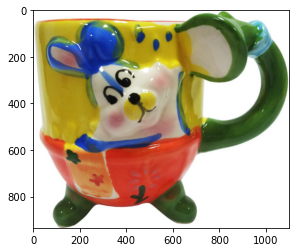

In [18]:
import cv2
from  matplotlib import pyplot as plt
%matplotlib inline

im = cv2.imread('Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', 1)
im2 = im[:,:,::-1] 
plt.imshow(im2)
plt.show()


In [19]:
im2.shape

(935, 1100, 3)

 ## I) Image processing
 
    2) Greyscale images with opencv

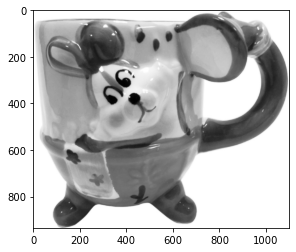

In [20]:
# Display a grey image
im = cv2.imread('Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', 1)
imgGray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

# Add some blur
imgBlur_cup1 = cv2.GaussianBlur(imgGray, (11, 11), 1) 
plt.imshow(imgBlur_cup1, cmap='Greys_r') 




 I) Image processing
 
3) Apply blur

In [21]:
# im_cup2 = cv2.imread('Images/2f712e172ee77a913b6d627657986b72.jpg', 1)
# imgGray_cup2 = cv2.cvtColor(im_cup2, cv2.COLOR_BGR2GRAY)

# imgBlur_cup2 = cv2.GaussianBlur(imgGray_cup2, (11, 11), 1) 
# plt.imshow(imgBlur_cup2, cmap='Greys_r') 

 ## I) Image processing
 
    4) Edge detection of the images

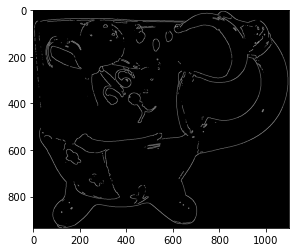

In [22]:
# Edge detection
imgCanny =cv2.Canny(imgBlur_cup1, 100, 100) # the 100 are the threshold values
plt.imshow(imgCanny, cmap='Greys_r')


 ## I) Image processing
 
    5) Increae the thikness of the edges

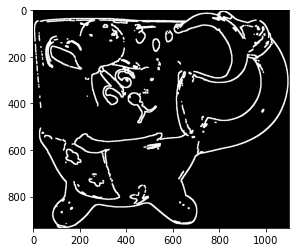

In [23]:
# we can change the thikness of the edges 
# This is done when the edges are discontinued , 
#because there is a gap or they are not joined prperly
# So we might want to increae the thinkness of the edges to beter visualize them 

# We have to creat a kernel which is a matrix that we'll be applying to our image pixels
kernel = np.ones((5,5),np.uint8) # 5,5 is the size of the matrix, unit8 means unsigned integer arrays of 8-bit( values ranging from 0 to 255) 

imgDialation= cv2.dilate(imgCanny, kernel, iterations = 1)

plt.imshow(imgDialation, cmap='Greys_r')

 ## I) Image processing
 
    6) Resize images

In [24]:
img_rotate_90_clockwise = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)
cv2.imwrite('./rotated_foto/' + 'rotated_90' + 'ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', img_rotate_90_clockwise)
# True

# img_rotate_90_counterclockwise = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
# cv2.imwrite('data/dst/lena_cv_rotate_90_counterclockwise.jpg', img_rotate_90_counterclockwise)
# # True

# img_rotate_180 = cv2.rotate(img, cv2.ROTATE_180)
# cv2.imwrite('data/dst/lena_cv_rotate_180.jpg', img_rotate_180)
# True 

True

 ## I) Image processing
 
    7) Rotate images

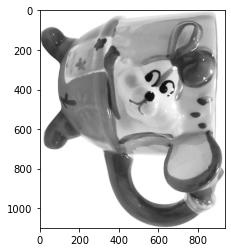

In [25]:
im_rotated = cv2.imread('./rotated_foto/rotated_90ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(im_rotated, cmap= 'Greys_r')


In [26]:
im_rotated.shape

(1100, 935)

   ## I) Image precessing 

    8) See All the image modification together by stacking the processed images 

In [27]:
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

In [28]:
imgStack = stackImages(0.6,([im, imgBlur_cup1],
                           [imgCanny, imgDialation]))

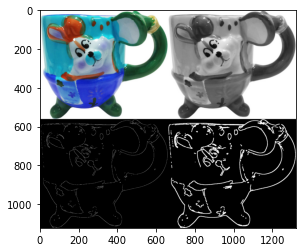

In [29]:
plt.imshow(imgStack, cmap='Greys_r')

## I) Image preprocessing 

    9) Function to do all the preprocessing steps for all images 

In [30]:
# Let's greyscale, resize (100 by 100 pixels) and put all the images in a new directory
def imagePreprocessor(images_dir_path, images_resized_dir_path, image_names):
   
    for image_name in image_names:
        image = cv2.imread(images_dir_path  +"/"+ image_name, cv2.IMREAD_GRAYSCALE)
        imgBlur = cv2.GaussianBlur(image, (11, 11), 1) 
        
            
        # Now let's resize the images
        image_resized = cv2.resize(imgBlur,(100,100), interpolation=cv2.INTER_AREA)
        cv2.imwrite(images_resized_dir_path + 'resized_' + image_name, image_resized )
      
    return ('Images resized successfully!')
       

In [154]:
imagePreprocessor('./Images', "./resized_images/", data['image'])


KeyboardInterrupt: 

## I) Image preprocessing

    10) Image Path creator
    
    To acces the images we need to have the path of the image.
    Here bellow the function will create the paths to every image based on their location and name.

In [27]:
# for filename in os.listdir('./resized_images/'):
#     print(filename)

In [31]:
def imagePathsCreator(path_to_images_dir, image_names_list):
    images_paths= []
    path_to_images_dir = path_to_images_dir 
    for i in image_names_list:  
        image_path = path_to_images_dir  +i
        images_paths.append(image_path)
    return images_paths



In [32]:
# Let's run the function
resized_images_paths = imagePathsCreator('./resized_images', data['image'])

## II) Image Feature Extraction

    1) Keypoints detection of an image

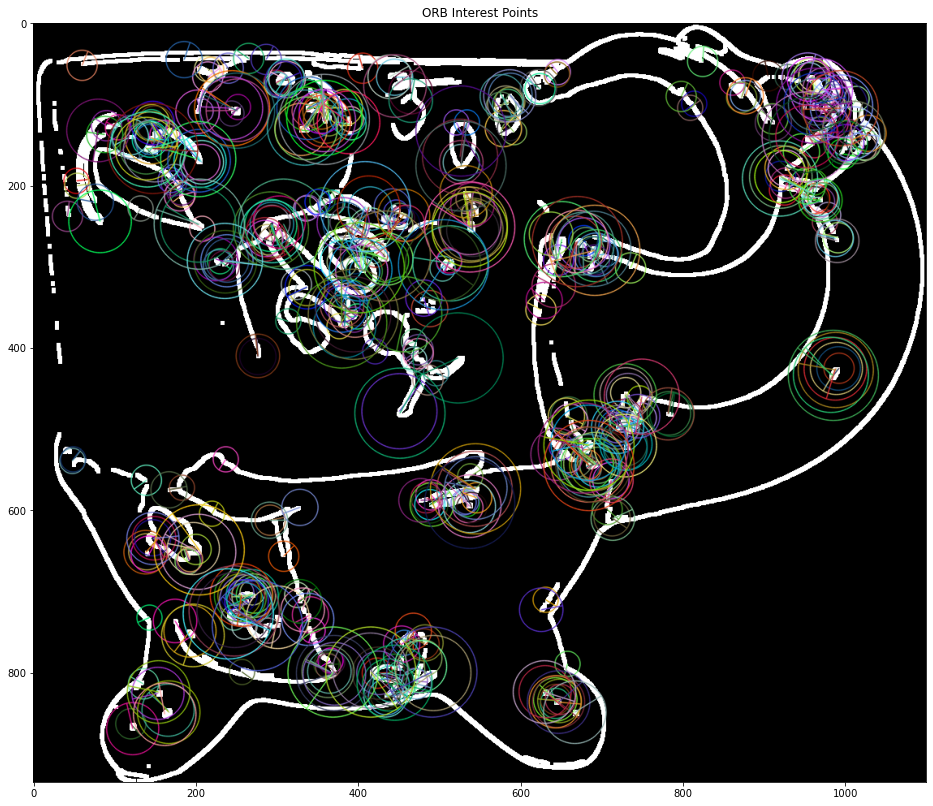

In [33]:
orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(imgDialation, None)
img_building_keypoints = cv2.drawKeypoints(imgDialation, 
                                           key_points, 
                                           imgDialation, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints) 
plt.show()

## II) Image Feature Extraction

  2) Compare each descriptors of the first image with the descriptors of the second image    

476


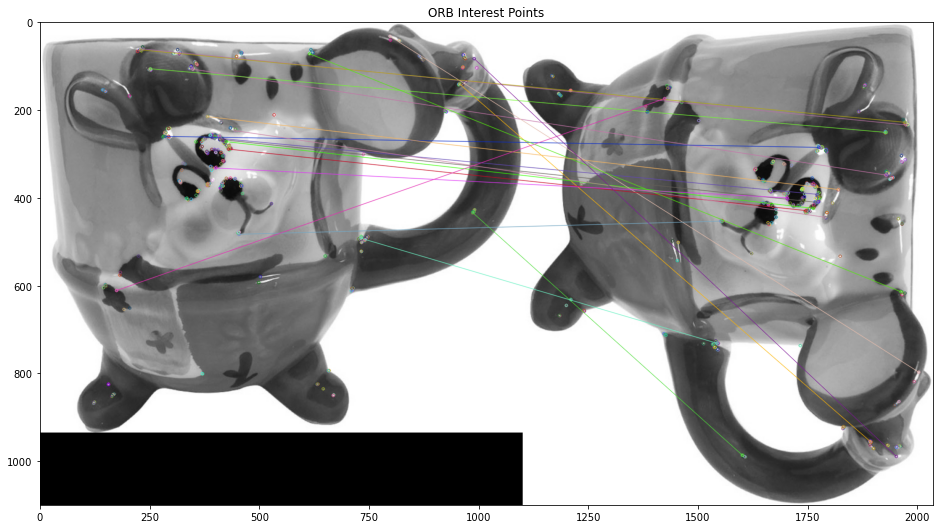

In [34]:

imGrey_normal = cv2.imread('Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', cv2.IMREAD_GRAYSCALE)
imGrey_rotated = cv2.imread('./rotated_foto/rotated_90ffbf3794aa8cb6bb8d3f313d0a549a09.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
kp1, desc1 = orb.detectAndCompute(imGrey_normal, None)
kp2, desc2 = orb.detectAndCompute(imGrey_rotated, None)

# Brute force matching
#Compare each descriptors of the first image with the descriptors of the second image
#descriptors are arrays of numbers describing each keypoints

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) # crossCheck picks the best features to be compared
matches = bf.match(desc1, desc2)
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))

# for matche in matches:
#     print(matche.distance) # the lower the number the better is the match

matching_result = cv2.drawMatches(imGrey_normal, kp1, imGrey_rotated, kp2, matches[0:20], None )# We take 20 best matches

# Show the matching keypoints in two images
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(matching_result) 
plt.show()

## III) Bag of visual words and images clustering into categories with Kmeans algorithm

    1) Load the images = assign a column with the matrices of images
    2)Features extraction
    3) Construct a dictionary of visual words
    

   ## 1) Load the images = create a column with the matrices of images

In [35]:
# Get the paths to the resized images
resized_images_paths = imagePathsCreator('./resized_images/resized_', data['image'])

In [36]:
# Paths to the original unprocessed images
original_images_paths = imagePathsCreator('./Images/', data['image'])
original_images_paths[0]

'./Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg'

In [37]:
# add column with the path of every image in the dataframe
data['resized_images_paths'] = resized_images_paths

In [38]:
# # Creat a datframe with images names and images paths only 
# df = data.copy()
# df = df[['image_path', 'image']]



In [39]:
# # dictionary of images 
# dic_image_path = df.set_index('image').T.to_dict('list')

In [40]:

# Let's take all matrices representing the image data from our image forder
def image_loader (images_paths):
    
    images_list = []
    
    for image_path in images_paths:
        im = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)
        images_list.append(im)
    return (images_list)

In [41]:

# Run the function        
images = image_loader (resized_images_paths)
print( 'The length of the images list is : ', len(images))

The length of the images list is :  1050


In [42]:
# Creat a colum with the images matrices in our dataframe 'data'
data['image_matrix'] = images

In [43]:
type(images[0])

numpy.ndarray

In [44]:
# Now we have a dataframe containing only image names and their corresponding matrix 
data_images_matrices = data.copy()
data_images_matrices = data_images_matrices[['image','image_matrix']]

In [45]:
data_images_matrices.head()

,image,image_matrix
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[202, 203, 203, 202, 202, 203, 203, 202, 201,..."
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,d4684dcdc759dd9cdf41504698d737d8.jpg,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[[128, 163, 148, 125, 105, 130, 145, 187, 184,..."


In [46]:
# Save data
data_images_matrices.to_csv("data_images.csv",  index=False)

In [107]:
data_images_matrices= pd.read_csv('data_images.csv')

In [108]:
data_images_matrices['image_matrix']

0       [[202 203 203 ... 171 171 170]\n [209 210 210 ...
1       [[255 255 255 ... 255 255 255]\n [255 255 255 ...
2       [[255 255 255 ... 255 255 255]\n [255 255 255 ...
3       [[255 255 255 ... 255 255 255]\n [255 255 255 ...
4       [[128 163 148 ... 213 211 220]\n [141 146 147 ...
                              ...                        
1045    [[246 230 232 ... 240 242 245]\n [187  27  16 ...
1046    [[228 228 228 ... 202 202 202]\n [228 228 228 ...
1047    [[255 255 255 ... 255 255 255]\n [255 255 255 ...
1048    [[ 54  54  54 ...  69  70  70]\n [ 55  54  54 ...
1049    [[227 227 227 ... 227 227 227]\n [227 227 227 ...
Name: image_matrix, Length: 1050, dtype: object

  ## 2) Feature extraction

In [47]:
import cv2
print(cv2.__version__)

4.5.5


In [109]:
images = image_loader (resized_images_paths)

In [110]:
# Creat a function to extract features from all  images and output them without order
def orbFeatureExtractor (images):
    orb = cv2.ORB_create()
   
    descriptor_list = []
    key_points = []
    
    for image in images:
   
        kp, desc = orb.detectAndCompute(image, None)
        #if desc is not None:
        descriptor_list.append(desc)
        key_points.append(kp)
       
    return descriptor_list, key_points

# run the function with all images
escriptor_list, key_points = orbFeatureExtractor (images)
print('the length of our list is :', len(escriptor_list))

the length of our list is : 1050


## A little detailed view of the output of our orbFeatureExtractor function and what are the keypoints and descriptos

In [52]:
# Number of keypoints of features selected on the first image of our data
len(key_points[0])

67

In [53]:
# Length of keypoints of features selected on the second image of our data 
len(key_points[1])

20

In [54]:
# The first element ( on position 0) of our descriptor list is --> for every keypoint from the 67 is a collection of a list of  32 pixel values of that keypoint
escriptor_list[0].shape

(67, 32)

In [56]:
df= pd.DataFrame(escriptor_list)

C:\Users\adele\anaconda3\lib\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [57]:
# Here we have all the pixel values for all the 67 keyponts ( exrtacted with ORB) vfor our fisrt image
for p in df[0][:1]: 
    for f in p:
        print(f)


[242  96  86 236  15 153 240  75 239 129 234  26 143 154  36 230 234 181
 123  32  12  39 147 208 147 248  10  58  21   8 113 134]
[ 67 251  17 131  58 137  42 190  42 121  24 237 172   6 198 182 167  79
 125  85 199  72 237 245 172  20  63 254  12   7   3  93]
[ 32  34  86  73  74 139  96  74 102  32 226 194 129 131   4  88 106 140
 106 136   0 248 197  80  84 160  18   0  49 136  99 136]
[117 132 135  28  90   2  68 234 114 162 226 202  99 225   0  81  57 236
  96 172  40 219 143  15  56 166  85   4 161  96  34 136]
[125  39 192  37 146   2  71 187 112 162 234 202  83  97 145 176 121 196
 104 238 105 179 197  14 248 175 165  20 111 240 122  40]
[ 96  34  72 137  76 137 104  64  37  32 226 130 129   3   0  88 106 140
 106 200   8 146 197  64 212 160 130   8  53 136  32 128]
[115  32  22 172  77 129 216  73 239 144 232  11 166 202 116  82 216 173
 106 165  14  35 210 221 149 184 139  59  80  40 104   6]
[ 75 187 189  19 106 216 187 152 174  92  30 228 252 198 202 102 134 121
 254  93 1

Pour chaque image on récupère les point importants pour son identification , par exemple pour l'image 1 nous avons 67 points 
(keypoits), chaque keypoint esr une list  composée de 32 valeurs qui sont les valeurs de pixels d'un key point.
Ainsi nous avons pour les 999 images des lists de lists de dimention de keypoints *32= feature

Ensuit nous allons mélanger tous ces features et ensuite nous allons appliquer Kmeans clusterer pour catégoriser les features qui sont similaires.
Ainsi nous allons construire un bag of features composé de 500 features 

Nous pouvons ainsi comparer nos images en fesant predict sur ces derniers avec le kmeans clustere qui a été entrainé sur l'ensemble de features.

Finalement nous allons construire les histogrammes 

The list of descriptors of length  999, means for every images in the 999 we have a list of lists and those lists contain the features= keypoints for every image

## 3) Cretaing a Bag of Visual Words /  Dictionary of Visual Words

In [111]:
# Add the column 'descriptor_list' to the data_images_matrices 
data_images_matrices['descriptor_list'] = escriptor_list

In [112]:
data_images_matrices.head(1)

,image,image_matrix,descriptor_list
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,[[202 203 203 ... 171 171 170]\n [209 210 210 ...,"[[242, 96, 86, 236, 15, 153, 240, 75, 239, 129..."


In [113]:
data_images_matrices.shape

(1050, 3)

<AxesSubplot:>

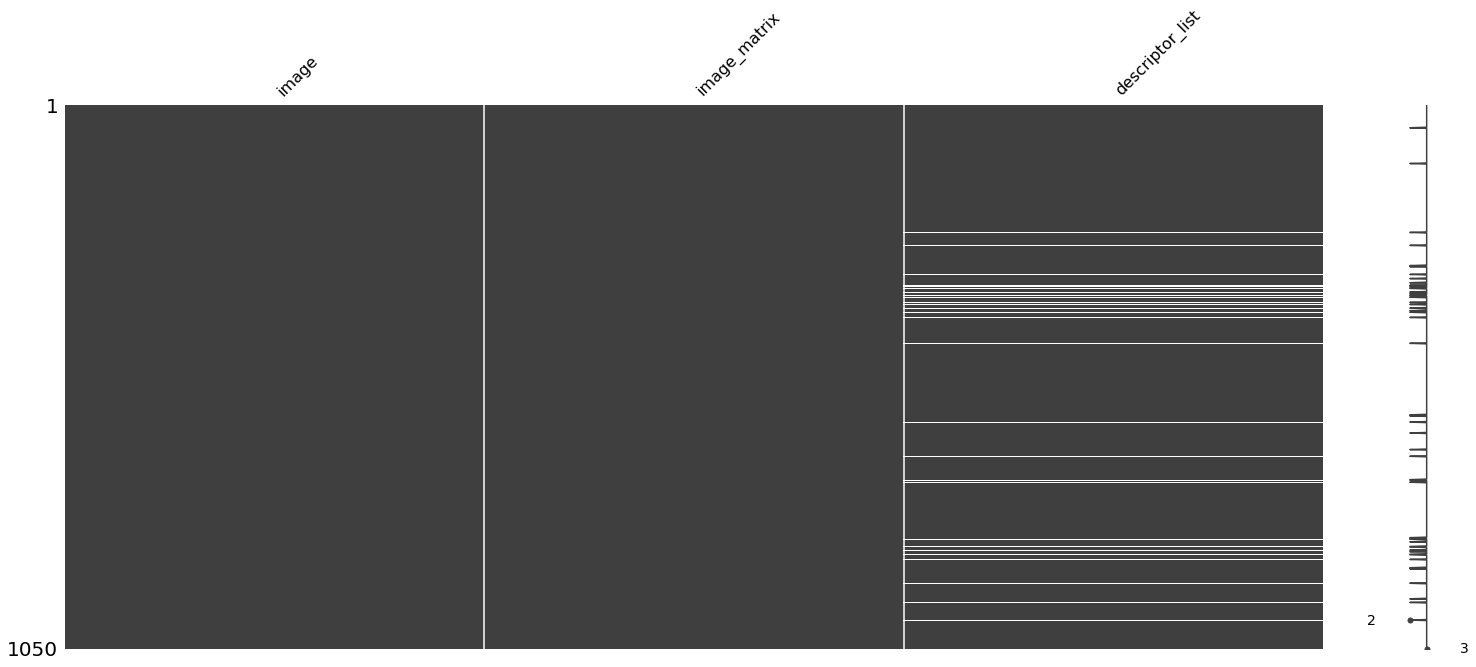

In [62]:
# Cheking for missing values 
import missingno as msno
msno.matrix(data_images_matrices)

In [114]:
# Put in list all the indices of images that are not in the directory , hense giving us the NAN descriptor values in our data_images_matrices dataframe
list_of_null_image_indices = data_images_matrices[data_images_matrices['descriptor_list'].isnull()].index.tolist()

In [115]:
len(list_of_null_image_indices)

51

In [116]:
list_of_null_image_indices

[44,
 113,
 246,
 271,
 310,
 312,
 327,
 335,
 343,
 348,
 350,
 353,
 354,
 361,
 364,
 367,
 368,
 371,
 381,
 385,
 392,
 397,
 400,
 410,
 460,
 598,
 600,
 612,
 633,
 665,
 678,
 723,
 724,
 728,
 835,
 837,
 838,
 843,
 852,
 853,
 859,
 862,
 867,
 868,
 877,
 893,
 895,
 923,
 953,
 960,
 994]

In [117]:
# Drop NAN values (rows with no images) and the first column 'Unnamed: 0'
data_images_matrices = data_images_matrices.dropna(how = 'any', axis=0)
#data_images_matrices = data_images_matrices.drop( columns= 'Unnamed: 0')
data_images_matrices.shape

(999, 3)

In [118]:
# Save data
data_images_matrices.to_csv("data_images_matrices.csv", index = False)

In [119]:
data_images_matrices.shape

(999, 3)

In [67]:
# In order to creat BOVW we need unordered descriptors of all images
stacked_orb_descriptors = np.vstack((data_images_matrices['descriptor_list']))
descriptors_float=stacked_orb_descriptors.astype(float)

In [68]:
descriptors_float.shape

(46537, 32)

In [103]:
# import pickle

# # save the output arrays
# with open('orb_features.pickle', 'wb') as f:
#     pickle.dump([descriptors_float], f)

In [104]:
# # Load the saved output arrays
# with open('orb_features.pickle', 'rb') as f:
#     descriptors_float = pickle.load(f)

In [69]:
import seaborn as sns
sns.set()
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=500, random_state=0, batch_size=30)
vis_words = kmeans.fit_predict(descriptors_float)
vis_words =  kmeans.cluster_centers_

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [70]:
vis_words.shape

(500, 32)

In [71]:
len(vis_words)

500

## 4) Contructing the histograms for all images

In [353]:

# from sklearn.cluster import KMeans

# """A k-means clustering algorithm which takes 2 parameter that are the number 
#  of cluster(k) and the other is descriptors list(unordered 1d array)
#  Returns an array that holds central points."""

# def kmeans_clust_of_images(number_of_clusters_k, descriptor_list):

    
#     # Instantiate the kmeans model 
#     kmeans = KMeans(n_clusters = number_of_clusters_k, n_init=10, random_state = 42)
    
#     #Calculates the central points which are the visual words 
#     kmeans.fit(descriptor_list)
#     visual_words = kmeans.cluster_centers_ 

    
#     return visual_words 
 
#visual_words = kmeans_clust_of_images(500, descriptors_float)

In [72]:


# Calculating the histograms for every image

def image_histogram_creator(images_descriptor_lists):
    
    indices_of_visual_words = []
    histograms = []
    
    for image_descriptors in images_descriptor_lists:
        # This gives the a list of numbers of the repeated indeces from the visual word (500 vis words)
        indices_visual_words = kmeans.predict(image_descriptors)
        # This will give the histogram of an image based on the 500 visual words
        histogram = np.bincount(indices_visual_words, minlength=500)
        
        indices_of_visual_words.append(indices_visual_words)
        histograms.append(histogram)
        
    return indices_of_visual_words, histograms 

In [73]:
indices_of_visual_words, histograms = image_histogram_creator(data_images_matrices['descriptor_list'])

In [74]:
len(histograms)

999

In [75]:
indices_of_visual_words[1]

array([183, 450, 145, 251, 145, 145, 228, 122, 183, 438,  24, 183,  24,
       183, 183,  24, 145,  88, 183, 183])

In [76]:
histograms[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [77]:
# Adding new column to the dataframe
data_images_matrices['indices_of_visual_words']= indices_of_visual_words

In [78]:
# Adding new column to the dataframe
data_images_matrices['histograms'] = histograms

In [79]:
data_images_matrices.head()

,image,image_matrix,descriptor_list,indices_of_visual_words,histograms
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,[[202 203 203 ... 171 171 170]\n [209 210 210 ...,"[[242, 96, 86, 236, 15, 153, 240, 75, 239, 129...","[41, 249, 203, 404, 124, 200, 22, 334, 317, 74...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,"[[189, 68, 107, 76, 86, 86, 239, 112, 84, 198,...","[183, 450, 145, 251, 145, 145, 228, 122, 183, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,"[[8, 6, 218, 220, 116, 162, 233, 67, 28, 130, ...","[145, 69, 63, 438, 212, 183, 483, 189, 400, 14...","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,d4684dcdc759dd9cdf41504698d737d8.jpg,[[255 255 255 ... 255 255 255]\n [255 255 255 ...,"[[59, 233, 66, 74, 93, 209, 90, 236, 199, 65, ...","[111, 342, 171, 13, 142, 88, 490, 88, 88, 185,...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,[[128 163 148 ... 213 211 220]\n [141 146 147 ...,"[[237, 25, 86, 68, 203, 28, 68, 56, 233, 240, ...","[355, 497, 342, 479, 309, 124, 5, 483, 8, 185,...","[0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, ..."


     Every time a visual word appears in the image that we want to describe or compare to our visual words, 
     we have 500 positions (indices) in the bellow image histogram we have the number 13 that is repeated 16 tims , 
     if we look at the hist1 represntation we can see the number 16 at the position 13,
     This means that the visual word of the position 13 is repeted 16 tims and that is the description of our image

## 5) Dimentionality reduction and kmeans clustering for catagorization

In [80]:
# We need to stack all the histograms lists into one to run kmeans clustering on it 
stacked_histograms = np.vstack((data_images_matrices['histograms']))
stacked_histograms=stacked_histograms.astype(float)


In [81]:
len(stacked_histograms)

999

In [87]:
data_images_matrices.columns 


Index(['image', 'image_matrix', 'descriptor_list', 'indices_of_visual_words',
       'histograms', 'true_labels'],
      dtype='object')

In [88]:
import time
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters

original_labels = data_images_matrices['true_labels'] 

def ARI_fct(histograms) :
    
    """ This function will take as input the histograms of the images
    Then it will reduce the dimentions of the histograms, then it'll feed these reduces pca values to the clusterer.
    Then it 'll  do t_sne reduction for vizualization""" 
    
    time1 = time.time()
    
    cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)    
    
    # Do the clustering with KMeans
    cls.fit(histograms)
    cluster_labels_ = cls.labels_
    
    ARI = np.round(metrics.adjusted_rand_score(original_labels, cluster_labels_),4) # Round the results to 4 decimals
    
    # T_sne reduction for visualization of PCA values
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(histograms)
    
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI,  X_tsne, cluster_labels_
       

## 6) Calculating similarity between original categories and categories obtained after clsutering and vizualization of clusters

In [93]:
def TSNE_visu_fct(X_tsne, original_labels, labels, ARI) :
    
    
    """ This function will plot the results of clustering 
    X_tsne = x_tsne reduced pca values
    original_labels = initial labels of the categories
    labels = labels after clustering
    ARI= Ari scores calculated with ARI_fct(features) function
    """
    
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c= data_images_matrices['true_labels'], cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(data_images_matrices['true_labels']), loc="best", title="Categorie")
    plt.title('Representation of true catgories')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Representation of categories by clusters')
    
    plt.show()
    print("ARI : ", ARI)

In [89]:
ARI_without_PCA,  X_tsne_without_PCA, cluster_labels_without_PCA = ARI_fct(stacked_histograms)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


ARI :  0.0314 time :  21.0


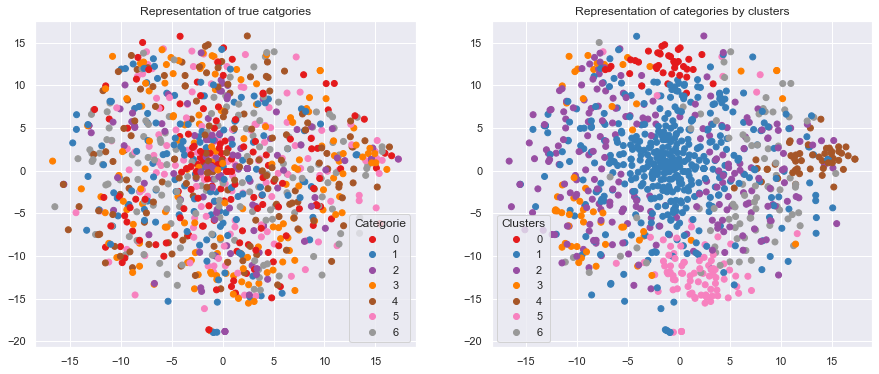

ARI :  0.0314


In [92]:
TSNE_visu_fct(X_tsne_without_PCA, original_labels, cluster_labels_without_PCA, ARI_without_PCA)

 ### IV) Convolutional Neural Networks Model VGG16 (CNN)
    CNN is a type of Artificila Neural Network used in image recognition that is specifivcally designed to process pixel Data

    VGG16 is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy.
    It is one of the popular algorithms for image classification and is easy to use with transfer learning.

In [94]:
import keras

In [95]:
keras.backend.backend()

'tensorflow'

In [468]:
pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=ffda9d722a97e3733a1d2ffefbaa66f359896c31617d210aa4e46c10fe98628c
  Stored in directory: c:\users\adele\appdata\local\pip\cache\wheels\53\ed\ef\144804f160c278c80d6429c97ed126b61276721894ce64cccc
Successfully built keras-resnet
Note: you may need to restart the kernel to use updated packages.


In [466]:
 pip install Keras-Applications

## Extracting features with CNN ( vgg16) for one image

In [96]:
images_matrices =images

In [97]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = 'Images/ffbf3794aa8cb6bb8d3f313d0a549a09.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

1/1 [==============================] - 1s 623ms/step


In [98]:
len(features.flatten())

25088

## Extracting features with CNN (resnet50) for all images

In [99]:
#plt.imshow(load_img(imgs_paths[1])) 

In [232]:
excisting_image = data['image'].drop(list_of_null_image_indices)
excisting_image.shape

(999,)

In [233]:
imgs_paths = imagePathsCreator('./Images/', excisting_image)

In [234]:
original_labels = data['category'].drop(list_of_null_image_indices)

In [235]:
len(original_labels)

999

In [124]:
# Encode the categories g
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
original_labels_encoded= le.fit_transform(original_labels)

In [125]:
# Imports for VGG16/ RESNET50 model

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
#model = VGG16(weights='imagenet', include_top=False) # compiler le RESNET50 resnet50('Weights','imagenet')
model = ResNet50(weights='imagenet', include_top=False) 
# iterate through all images
images_paths = imgs_paths
all_features=[]

for image_path in imgs_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    features = model.predict(x)
    
    
    #features = features.flatten() 
    features = features.reshape(-1) # au lieu de -1 o,n peut mettre 7*7*512
    
    all_features.append(features)
    


1/1 [==============================] - 0s 154ms/step


In [127]:
all_features = np.asarray(all_features)

In [128]:
all_features.shape

(999, 100352)

In [129]:
all_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [248]:
# stacked_all_features = np.vstack(all_features)
# stacked_all_features=stacked_all_features.astype(float)


In [130]:
#stacked_all_features.shape 

## PCA dimentionality reduction + clustering (Kmeans) + T-sne reduction  + ARI scores calculation 

In [216]:
from sklearn.manifold import Isomap
import time
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters



def ARI_fct(CNN_features) :
    
    """ This function will take as input the histograms of the images
    Then it will reduce the dimentions of the histograms, then it'll feed these reduces pca values to the clusterer.
    Then it 'll  do t_sne reduction for vizualization""" 
    
    time1 = time.time()
    
    # # Dimentionality reduction with PCA
    # pca = PCA(n_components = 0.50)
    # pca_values = pca.fit_transform(CNN_features)
    embedding = Isomap()
    X_transformed = embedding.fit_transform(CNN_features)
    cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=16, max_iter =1000)    
    
    # Do the clustering with KMeans
    cls.fit(X_transformed)
    cluster_labels_ = cls.labels_
    
    ARI = np.round(metrics.adjusted_rand_score(original_labels, cluster_labels_),4) # Round the results to 4 decimals
    
    # T_sne reduction for visualization of PCA values
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(X_transformed)
    
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI,  X_tsne, cluster_labels_

In [217]:
ARI_CNN,  X_tsne_CNN, cluster_labels__CNN = ARI_fct(all_features)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


ARI :  0.106 time :  15.0


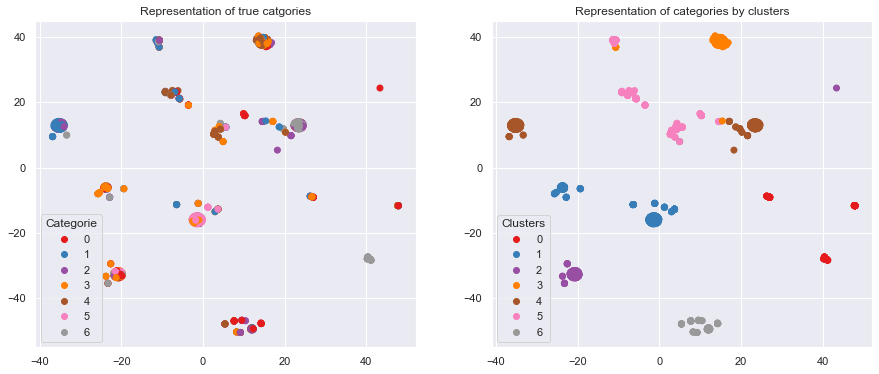

ARI :  0.106


In [218]:
TSNE_visu_fct(X_tsne_CNN, original_labels, cluster_labels__CNN, ARI_CNN)

In [223]:
model = ResNet50(weights='imagenet', include_top=False) 

def extract_vector(path):
    resnet_feature_list = []

    for im in imgs_paths:

        im = cv2.imread(im)
        im = cv2.resize(im,(224,224))
        img = preprocess_input(np.expand_dims(im.copy(), axis=0))
        resnet_feature = model.predict(img)
        resnet_feature_np = np.array(resnet_feature)
        resnet_feature_list.append(resnet_feature_np.flatten())

    return np.array(resnet_feature_list)

In [224]:
resnet_feature_list = extract_vector(imgs_paths)

1/1 [==============================] - 0s 188ms/step


In [225]:
resnet_feature_list.shape

(999, 100352)

In [226]:
resnet_feature_list

array([[3.603582  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.3835545 ],
       ...,
       [0.10777086, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.9661217 , 0.        ,
        0.        ]], dtype=float32)

In [236]:
import time
from sklearn import manifold, decomposition
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters

original_labels =original_labels

def ARI_fct(histograms) :
    
    """ This function will take as input the histograms of the images
    Then it will reduce the dimentions of the histograms, then it'll feed these reduces pca values to the clusterer.
    Then it 'll  do t_sne reduction for vizualization""" 
    
    time1 = time.time()
    
    # Dimentionality reduction with PCA
    pca = PCA(n_components=0.99)
    pca_values = pca.fit_transform(histograms)
    
    cls = cluster.KMeans(n_clusters=7, n_init=100, random_state=42)    
    
    # Do the clustering with KMeans
    cls.fit(pca_values)
    cluster_labels_ = cls.labels_
    
    ARI = np.round(metrics.adjusted_rand_score(original_labels, cluster_labels_),5) # Round the results to 4 decimals
    
    # T_sne reduction for visualization of PCA values
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(pca_values)
    
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, pca_values,  X_tsne, cluster_labels_

In [237]:
ARI_CNN, pca_values_CNN,  X_tsne_CNN, cluster_labels__CNN = ARI_fct(resnet_feature_list)

C:\Users\adele\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


ARI :  0.37139 time :  47.0


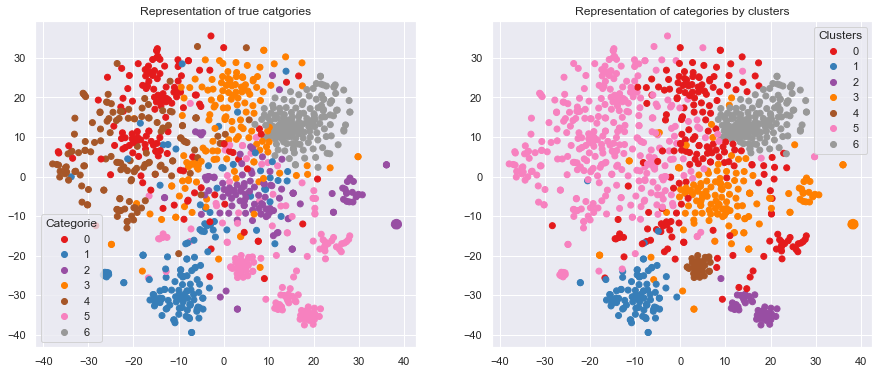

ARI :  0.37139


In [238]:
TSNE_visu_fct(X_tsne_CNN, original_labels, cluster_labels__CNN, ARI_CNN)